Order and Shipping Analysis

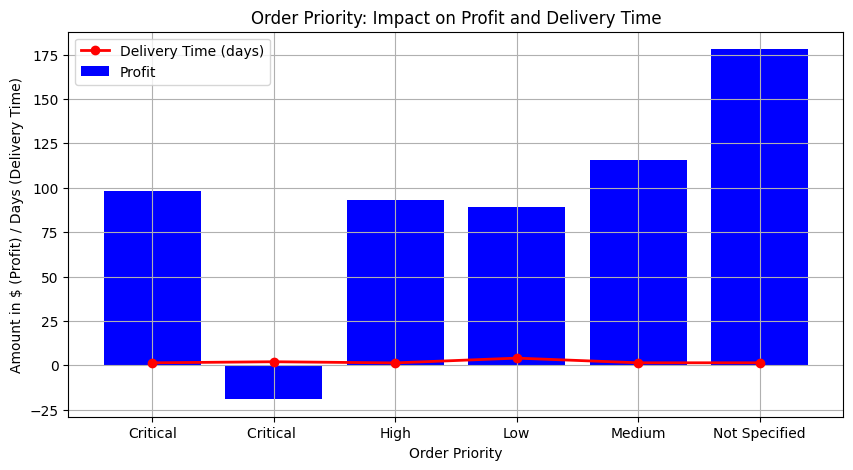

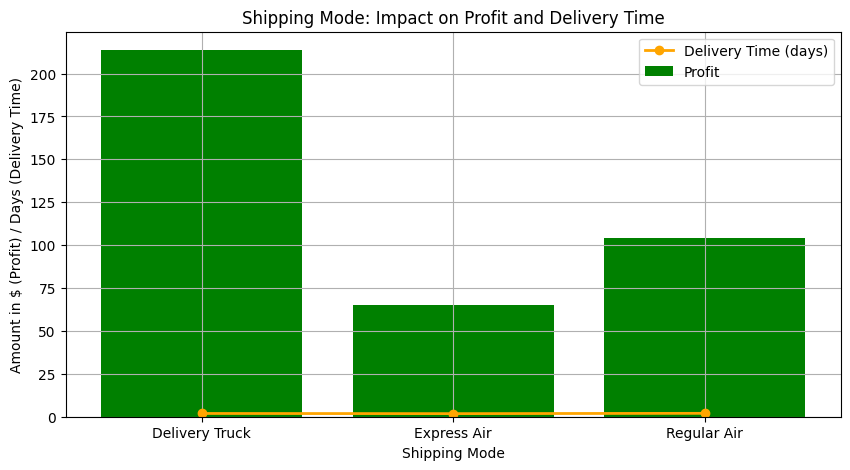

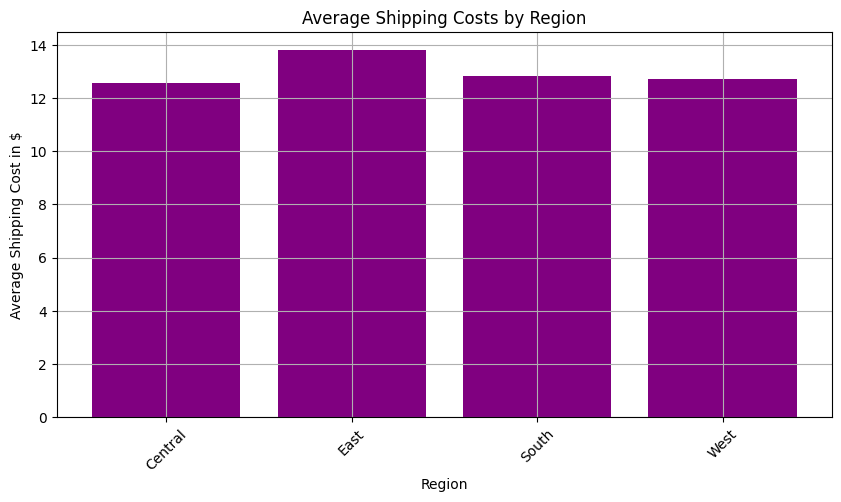

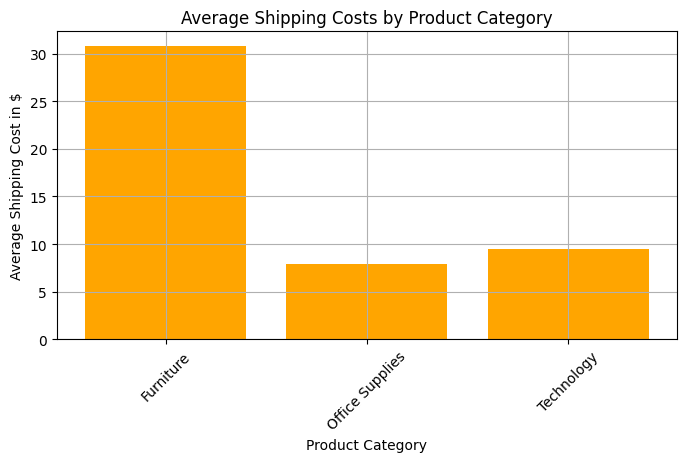

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('StoreUS-2015.csv')

# Step 1: Convert date columns to datetime for analyzing delivery times
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

# Step 2: Calculate delivery time (difference between Ship Date and Order Date)
data['Delivery Time'] = (data['Ship Date'] - data['Order Date']).dt.days

# Step 3: Analyze how Order Priority affects Profit and Delivery Time
priority_analysis = data.groupby('Order Priority').agg({
    'Profit': 'mean',  # Average profit per priority level
    'Delivery Time': 'mean'  # Average delivery time
}).reset_index()

# Step 4: Analyze how Shipping Mode affects Profit and Delivery Time
shipping_mode_analysis = data.groupby('Ship Mode').agg({
    'Profit': 'mean',  # Average profit per shipping mode
    'Delivery Time': 'mean'  # Average delivery time
}).reset_index()

# Step 5: Visualize Shipping Costs across Regions
shipping_cost_by_region = data.groupby('Region').agg({
    'Shipping Cost': 'mean'  # Average shipping cost by region
}).reset_index()

# Step 6: Visualize Shipping Costs across Product Categories
shipping_cost_by_category = data.groupby('Product Category').agg({
    'Shipping Cost': 'mean'  # Average shipping cost by product category
}).reset_index()

# Step 7: Plotting

# Plot 1: Order Priority vs Profit and Delivery Time
plt.figure(figsize=(10, 5))
plt.bar(priority_analysis['Order Priority'], priority_analysis['Profit'], color='blue', label='Profit')
plt.plot(priority_analysis['Order Priority'], priority_analysis['Delivery Time'], color='red', marker='o', label='Delivery Time (days)', linewidth=2)
plt.title('Order Priority: Impact on Profit and Delivery Time')
plt.xlabel('Order Priority')
plt.ylabel('Amount in $ (Profit) / Days (Delivery Time)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Shipping Mode vs Profit and Delivery Time
plt.figure(figsize=(10, 5))
plt.bar(shipping_mode_analysis['Ship Mode'], shipping_mode_analysis['Profit'], color='green', label='Profit')
plt.plot(shipping_mode_analysis['Ship Mode'], shipping_mode_analysis['Delivery Time'], color='orange', marker='o', label='Delivery Time (days)', linewidth=2)
plt.title('Shipping Mode: Impact on Profit and Delivery Time')
plt.xlabel('Shipping Mode')
plt.ylabel('Amount in $ (Profit) / Days (Delivery Time)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Shipping Costs by Region
plt.figure(figsize=(10, 5))
plt.bar(shipping_cost_by_region['Region'], shipping_cost_by_region['Shipping Cost'], color='purple')
plt.title('Average Shipping Costs by Region')
plt.xlabel('Region')
plt.ylabel('Average Shipping Cost in $')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot 4: Shipping Costs by Product Category
plt.figure(figsize=(8, 4))
plt.bar(shipping_cost_by_category['Product Category'], shipping_cost_by_category['Shipping Cost'], color='orange')
plt.title('Average Shipping Costs by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Shipping Cost in $')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
